In [70]:
from sklearn import datasets, cross_validation, tree, ensemble
from math import sqrt
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/andreybrylov/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [67]:
def write_to_file(answer):
    with open('answ5', 'w') as fout:
        fout.write(str(answer))

In [59]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape[1]

64

## Первое задание

In [46]:
clf = tree.DecisionTreeClassifier()
write_to_file(cross_validation.cross_val_score(clf, X, y, cv=10).mean())

## Второе задание

In [48]:
BaggingClassifier = ensemble.BaggingClassifier(base_estimator=clf, n_estimators=100)
write_to_file(cross_validation.cross_val_score(BaggingClassifier, X, y, cv=10).mean())

## Третье задание 

In [50]:
BaggingClassifier_1 = ensemble.BaggingClassifier(base_estimator=clf, max_features=sqrt(X.shape[1])/X.shape[1], n_estimators=100)
write_to_file(cross_validation.cross_val_score(BaggingClassifier_1, X, y, cv=10).mean())

## Четвертое задание

In [52]:
clf_1 = tree.DecisionTreeClassifier(max_features = 'sqrt')
BaggingClassifier_2 = ensemble.BaggingClassifier(base_estimator=clf_1, n_estimators=100)
write_to_file(cross_validation.cross_val_score(BaggingClassifier_2, X, y, cv=10).mean())

## Пятое задание

In [44]:
RandomForestClassifier = ensemble.RandomForestClassifier()
cross_validation.cross_val_score(RandomForestClassifier, X, y, cv=10).mean()

0.92106900982808426

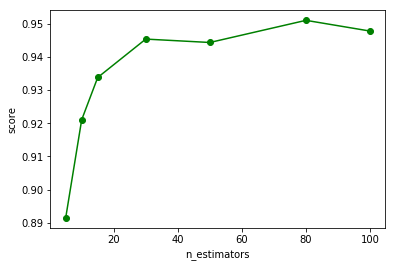

In [71]:
#Зависимость качества от количества деревьев
x = [5, 10, 15, 30, 50, 80, 100]
scores = []
for i in x:
    RandomForestClassifier = ensemble.RandomForestClassifier(n_estimators = i)
    scores.append(cross_validation.cross_val_score(RandomForestClassifier, X, y, cv=10).mean())
    
plt.plot(x, scores, 'g-', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

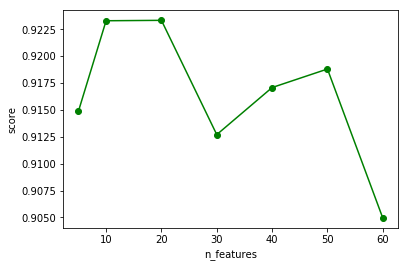

In [72]:
# Зависимость качества от количества признаков 
xx = [5, 10, 20, 30, 40, 50, 60]
scores = []
for i in xx:
    RandomForestClassifier = ensemble.RandomForestClassifier(max_features=i)
    scores.append(cross_validation.cross_val_score(RandomForestClassifier, X, y, cv=10).mean())

plt.plot(xx, scores, 'g-', marker='o')
plt.xlabel('n_features')
plt.ylabel('score')
plt.show()

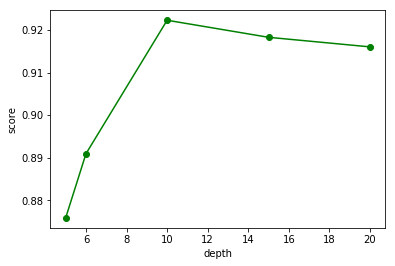

In [63]:
# Зависимость качества от глубины дерева
xxx = [5, 6, 10, 15, 20]
scores = []

for i in xxx:
    RandomForestClassifier = ensemble.RandomForestClassifier(max_depth=i)
    scores.append(cross_validation.cross_val_score(RandomForestClassifier, X, y, cv=10).mean())
    
plt.plot(xxx, scores, 'g-', marker='o')
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

